In [200]:
import pandas as pd
import numpy as np
from ast import literal_eval
from wordcloud import WordCloud
import string
from string import punctuation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [267]:
df1=pd.read_csv('minor 2/cross_platform.csv')

In [269]:
df1.head()
df1.drop('Unnamed: 0',axis=1)

,Genres,Name,Year,Platform
0,TV Sci-Fi & Fantasy TV Mysteries TV Dramas US ...,12 MonkeysSeason 1 (13 episodes)Season 2 (13 e...,2016,Netflix
1,TV Comedies TV Dramas Romantic TV Shows Korean...,12 Years PromiseSeason 1 (26 episodes),2014,Netflix
2,TV Mysteries TV Dramas Crime TV Dramas Crime T...,13 Reasons WhyOriginalSeason 1 (13 episodes)Se...,2018,Netflix
3,Documentaries Crime Documentaries Docuseries C...,13 Reasons Why: Beyond the ReasonsOriginalSeas...,2018,Netflix
4,TV Mysteries TV Dramas Political TV Shows Crim...,1983OriginalSeason 1 (8 episodes),2018,Netflix
...,...,...,...,...
1984,"Drama: Thriller, Drama: Political, Drama: War,...",The Man in the High Castle – Season 2 [Ultra HD],2016,Amazon Prime
1985,"Comedy: Sport, Sport: Motor Sport, Documentary...",The Grand Tour Season 1 [Ultra HD],2017,Amazon Prime
1986,"Comedy, Drama",Mozart in the Jungle – Season 3 [Ultra HD],2016,Amazon Prime
1987,Comedy,Red Oaks – Season 2 [Ultra HD],2016,Amazon Prime


In [270]:
df=df1


In [271]:
df.sample(15)
#df.drop('index',axis=1)

,Unnamed: 0,Genres,Name,Year,Platform
816,816,TV Comedies TV Dramas Romantic TV Shows,Loving Ibiza: SeriesSeason 1 (8 episodes),2013,Netflix
1288,1288,Animation TV Cartoons Kids' TV Shows Animated ...,Sylvanian FamiliesSeason 1 (12 episodes),2018,Netflix
353,353,TV Sci-Fi & Fantasy TV Action & Adventure TV D...,Diary of a Night WatchmanDiary of a Night Watc...,2014,Netflix
434,434,Reality TV Shows British TV Shows,Extreme Apprentices: Slum SurvivorsSeason 1 (3...,2014,Netflix
649,649,Documentaries Docuseries British TV Shows,Inside the FreemasonsSeason 1 (5 episodes),2017,Netflix
1792,131,Talk Shows,The Late Late Show with James Corden,2017,Amazon Prime
1820,159,Anime,Magical Girl Lyrical NANOHA,2004,Amazon Prime
1869,208,"Documentary: History, Documentary: Biography","Napoleon, Season 1",2015,Amazon Prime
95,95,TV Dramas Romantic TV Shows Chinese TV Shows T...,Autumn's ConcertoAutumn's Concerto (34 episodes),2009,Netflix
465,465,Documentaries Docuseries US TV Shows,First and LastOriginalSeason 1 (6 episodes),2018,Netflix


In [272]:
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [273]:
stop_nltk = stopwords.words("english")

In [274]:
stop_updated = stop_nltk + list(punctuation) + ["tv","shows","british","american","new zealand","taiwanese","chinese","argentenian","malaysian","korean","indian"]

In [275]:
def  clean_txt(genres):
    tokens = word_tokenize(genres.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens 
               if term not in stop_updated and len(term) > 2] 
    res= " ".join(stemmed)
    res1= res.replace("show ","") 
    return res1

In [276]:
df['clean_genre'] = df.Genres.apply(clean_txt)
#df.head()

In [78]:
#df3.to_csv('Amazon Prime TV.csv')

In [277]:
genres_combined = " ".join(df.clean_genre.values)
#genres_combined

In [278]:
word_cloud = WordCloud(width=800,height=800,background_color='white').\
generate_from_text(genres_combined) 

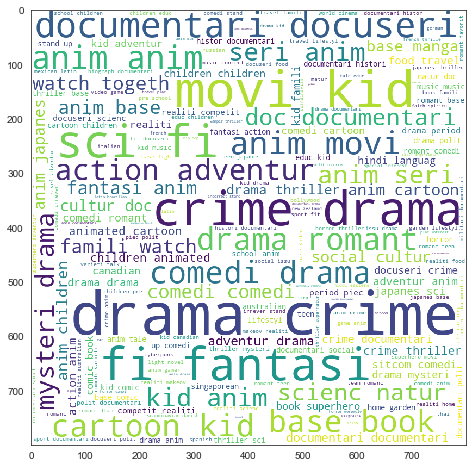

In [279]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)


In [280]:
all_terms = []
fdist = {}
all_terms = genres_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [281]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

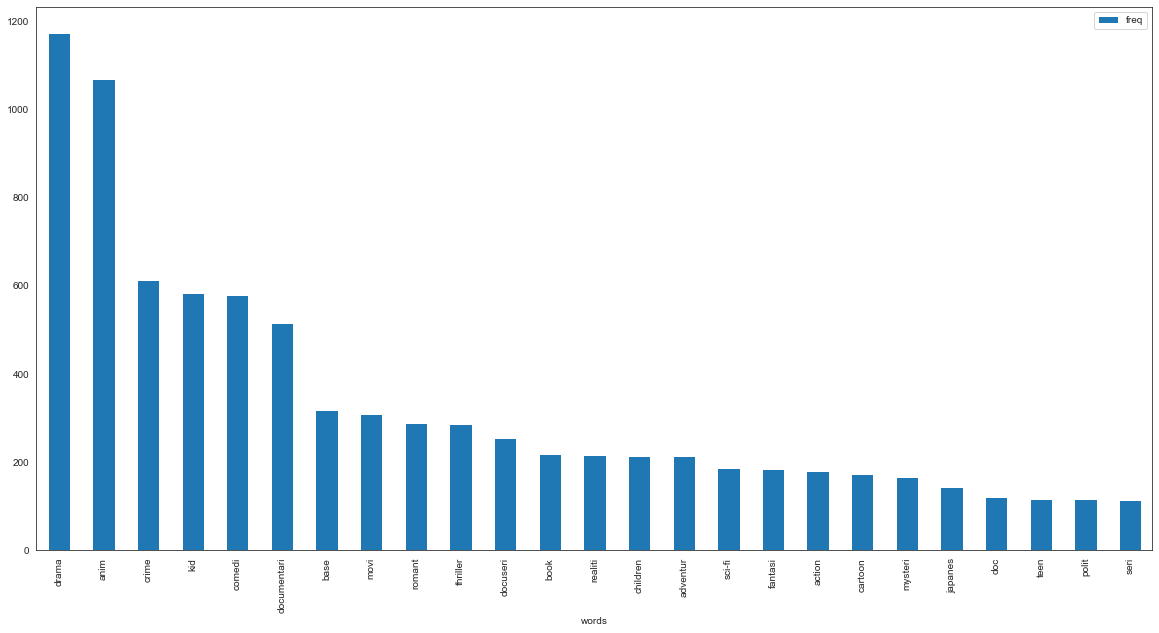

In [282]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,10)) 

In [227]:
#df.head()

,Genres,Name,Year,Platform,index,clean_genre
0,TV Sci-Fi & Fantasy TV Mysteries TV Dramas US ...,12 MonkeysSeason 1 (13 episodes)Season 2 (13 e...,2016,Netflix,NaN,sci-fi fantasi mysteri drama thriller cyberpunk
1,TV Comedies TV Dramas Romantic TV Shows Korean...,12 Years PromiseSeason 1 (26 episodes),2014,Netflix,NaN,comedi drama romant
2,TV Mysteries TV Dramas Crime TV Dramas Crime T...,13 Reasons WhyOriginalSeason 1 (13 episodes)Se...,2018,Netflix,NaN,mysteri drama crime drama crime teen base book
3,Documentaries Crime Documentaries Docuseries C...,13 Reasons Why: Beyond the ReasonsOriginalSeas...,2018,Netflix,NaN,documentari crime documentari docuseri crime
4,TV Mysteries TV Dramas Political TV Shows Crim...,1983OriginalSeason 1 (8 episodes),2018,Netflix,NaN,mysteri drama polit crime drama crime thriller...


In [283]:
df = df.reset_index()
titles = df[['Name','Platform']]
indices = pd.Series(df.index, index=df['Name'])

In [284]:
indices

Name
12 MonkeysSeason 1 (13 episodes)Season 2 (13 episodes)                                     0
12 Years PromiseSeason 1 (26 episodes)                                                     1
13 Reasons WhyOriginalSeason 1 (13 episodes)Season 2 (13 episodes)                         2
13 Reasons Why: Beyond the ReasonsOriginalSeason 2 (1 episodes)Season 1 (1 episodes)       3
1983OriginalSeason 1 (8 episodes)                                                          4
                                                                                        ... 
The Man in the High Castle – Season 2 [Ultra HD]                                        1984
The Grand Tour Season 1 [Ultra HD]                                                      1985
Mozart in the Jungle – Season 3 [Ultra HD]                                              1986
Red Oaks – Season 2 [Ultra HD]                                                          1987
Sneaky Pete – Season 1 [Ultra HD]                                

In [285]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [286]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(df['clean_genre'])

In [288]:
count_matrix.shape

(1989, 830)

In [287]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [289]:
cosine_sim[0]

array([1.        , 0.12403473, 0.24209101, ..., 0.16012815, 0.        ,
       0.16012815])

In [297]:
get_recommendations('Goliath')

,Name,Platform
1720,Goliath,Amazon Prime
1694,In Night So Ransomed Rogue,Amazon Prime
1734,Blindspot,Amazon Prime
1884,Blindspot: The Complete First Season,Amazon Prime
1890,Blindspot: Season 2,Amazon Prime
1684,Folie a Deux,Amazon Prime
1707,Elementary – Season 5,Amazon Prime
1729,Elementary,Amazon Prime
1862,Elementary – Season 1,Amazon Prime
1685,"The Girlfriend Experience, Season 1",Amazon Prime


In [295]:
df.sample(10)

,index,Unnamed: 0,Genres,Name,Year,Platform,clean_genre
1782,1782,121,"Comedy, World Cinema: Indian",Man’s World,2015,Amazon Prime,comedi world cinema
103,103,103,TV Comedies Romantic TV Shows Chinese TV Shows...,Back to 1989Season 1 (34 episodes),2016,Netflix,comedi romant
1720,1720,59,"Drama: Thriller, Drama: Crime",Goliath,2016,Amazon Prime,drama thriller drama crime
521,521,521,TV Dramas US TV Shows,GodlessOriginalLimited Series (7 episodes),2017,Netflix,drama
81,81,81,TV Dramas Crime TV Dramas Crime TV Shows US TV...,AquariusSeason 1 (13 episodes)Season 2 (13 epi...,2016,Netflix,drama crime drama crime
1673,1673,12,Comedy,Crisis in Six Scenes Season 1,2016,Amazon Prime,comedi
1814,1814,153,Anime,Scum’s Wish,2017,Amazon Prime,anim
1765,1765,104,Documentary: History,Museum Secrets,2011,Amazon Prime,documentari histori
324,324,324,Dark Comedies Comedies TV Comedies Irreverent ...,Dave ChappelleOriginalCollection (2 episodes),2017,Netflix,dark comedi comedi comedi irrever stand-up com...
897,897,897,TV Comedies TV Dramas Romantic TV Shows Korean...,Miss Panda & Mr. HedgehogSeason 1 (16 episodes),2012,Netflix,comedi drama romant
